# Aplicação Base Iris

## Preparação

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [3]:
iris = pd.read_csv("iris.csv")

In [4]:
iris.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## EDA

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento_sepala  150 non-null    float64
 1   largura_sepala      150 non-null    float64
 2   comprimento_petala  150 non-null    float64
 3   largura_petala      150 non-null    float64
 4   Tipo_Orquidea       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
comprimento_sepala,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
largura_sepala,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
comprimento_petala,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
largura_petala,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
Tipo_Orquidea,150.0,0.333333,0.472984,0.0,0.0,0.00,1.0,1.0


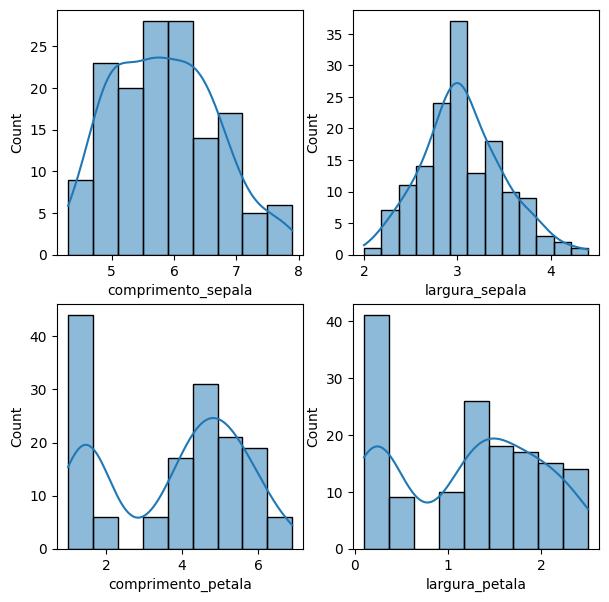

In [31]:
figs, axs = plt.subplots(2, 2, figsize = (7, 7))

sns.histplot(data=iris, x= "comprimento_sepala", kde = True, ax = axs[0, 0])
sns.histplot(data=iris, x= "largura_sepala", kde = True, ax = axs[0, 1])
sns.histplot(data=iris, x= "comprimento_petala", kde = True, ax = axs[1, 0])
sns.histplot(data=iris, x= "largura_petala", kde = True, ax = axs[1, 1]);


## Modelagem